In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_China.csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed deaths': 'China Deaths', \
                                  'Confirmed Recovered': 'China Recovered'})

In [122]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,China Confirmed Cases,Confirmed Deaths,China Recovered
4,01/26/2020,2075,56,49
5,01/27/2020,2877,82,58
6,01/28/2020,5509,131,101
7,01/29/2020,6087,133,120
8,01/30/2020,8141,171,135


In [0]:
china_confirmed_cases = raw_seq['China Confirmed Cases']
china_deaths = raw_seq['Confirmed Deaths']
china_recovered = raw_seq['China Recovered']

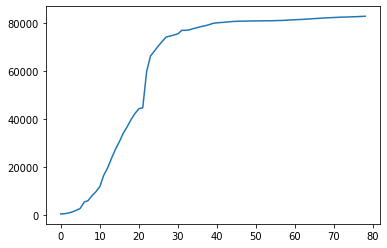

In [124]:
raw_seq['China Confirmed Cases'].plot()

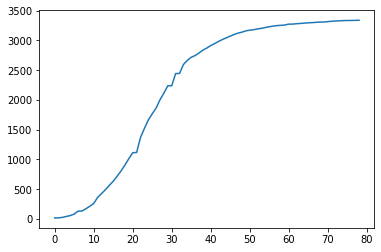

In [125]:
raw_seq['Confirmed Deaths'].plot()

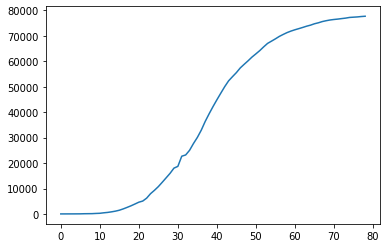

In [126]:
raw_seq['China Recovered'].plot()

In [127]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(china_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(china_confirmed_cases)
pred_val = []
for i in range(x):
  i=china_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[565.42847]]
1/1 [==============================] - 0s 854us/step
[[661.1544]]
1/1 [==============================] - 0s 6ms/step
[[940.2714]]
1/1 [==============================] - 0s 6ms/step
[[1429.9858]]
1/1 [==============================] - 0s 1ms/step
[[2104.0986]]
1/1 [==============================] - 0s 1ms/step
[[2912.2283]]
1/1 [==============================] - 0s 875us/step
[[5564.344]]
1/1 [==============================] - 0s 1ms/step
[[6146.7607]]
1/1 [==============================] - 0s 922us/step
[[8216.458]]
1/1 [==============================] - 0s 577us/step
[[9890.154]]
1/1 [==============================] - 0s 819us/step
[[11995.119]]
1/1 [==============================] - 0s 519us/step
[[16770.338]]
1/1 [==============================] - 0s 842us/step
[[19879.922]]
1/1 [==============================] - 0s 2ms/step
[[23901.422]]
1/1 [==============================] - 0s 1ms/step
[[27662.955]]
1/1 [==========

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [129]:
print(t1)

         Dates  China Confirmed Cases  ...  China Recovered  Predicted Cases
0   01/22/2020                    548  ...               28       565.428467
1   01/23/2020                    643  ...               30       661.154419
2   01/24/2020                    920  ...               36       940.271423
3   01/25/2020                   1406  ...               39      1429.985840
4   01/26/2020                   2075  ...               49      2104.098633
5   01/27/2020                   2877  ...               58      2912.228271
6   01/28/2020                   5509  ...              101      5564.344238
7   01/29/2020                   6087  ...              120      6146.760742
8   01/30/2020                   8141  ...              135      8216.458008
9   01/31/2020                   9802  ...              214      9890.154297
10  02/01/2020                  11891  ...              275     11995.119141
11  02/02/2020                  16630  ...              463     16770.337891

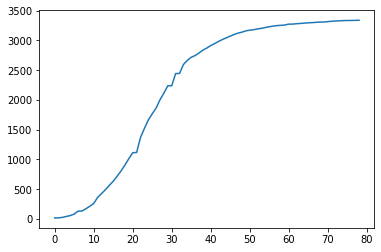

In [130]:
t1['Confirmed Deaths'].plot()

In [131]:
# Ontario Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(china_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(china_deaths)
pred_val = []
for i in range(x):
  i=china_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 13ms/step
[[32.550804]]
1/1 [==============================] - 0s 2ms/step
[[33.570232]]
1/1 [==============================] - 0s 695us/step
[[41.725685]]
1/1 [==============================] - 0s 639us/step
[[57.882385]]
1/1 [==============================] - 0s 597us/step
[[71.87737]]
1/1 [==============================] - 0s 952us/step
[[97.868095]]
1/1 [==============================] - 0s 2ms/step
[[146.85057]]
1/1 [==============================] - 0s 617us/step
[[148.84988]]
1/1 [==============================] - 0s 627us/step
[[186.8363]]
1/1 [==============================] - 0s 606us/step
[[228.82129]]
1/1 [==============================] - 0s 639us/step
[[274.80487]]
1/1 [==============================] - 0s 627us/step
[[376.76846]]
1/1 [==============================] - 0s 818us/step
[[440.74557]]
1/1 [==============================] - 0s 807us/step
[[506.72202]]
1/1 [==============================] - 0s 780us/step
[[578.6963]]
1/1

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [133]:
print(t2)

         Dates  China Confirmed Cases  ...  Predicted Cases  Predicted Deaths
0   01/22/2020                    548  ...       565.428467         32.550804
1   01/23/2020                    643  ...       661.154419         33.570232
2   01/24/2020                    920  ...       940.271423         41.725685
3   01/25/2020                   1406  ...      1429.985840         57.882385
4   01/26/2020                   2075  ...      2104.098633         71.877373
5   01/27/2020                   2877  ...      2912.228271         97.868095
6   01/28/2020                   5509  ...      5564.344238        146.850571
7   01/29/2020                   6087  ...      6146.760742        148.849884
8   01/30/2020                   8141  ...      8216.458008        186.836304
9   01/31/2020                   9802  ...      9890.154297        228.821289
10  02/01/2020                  11891  ...     11995.119141        274.804871
11  02/02/2020                  16630  ...     16770.337891     

In [134]:
t2.tail(10)

,Dates,China Confirmed Cases,Confirmed Deaths,China Recovered,Predicted Cases,Predicted Deaths
69,03/31/2020,82279,3309,76206,82921.078125,3323.715576
70,04/01/2020,82361,3316,76405,83003.710938,3330.713379
71,04/02/2020,82432,3322,76565,83075.234375,3336.711182
72,04/03/2020,82511,3326,76760,83154.835938,3340.709473
73,04/04/2020,82543,3330,76946,83187.070312,3344.707520
74,04/05/2020,82602,3333,77207,83246.539062,3347.707031
75,04/06/2020,82665,3335,77310,83310.015625,3349.706055
76,04/07/2020,82718,3335,77410,83363.421875,3349.706055
77,04/08/2020,82809,3337,77567,83455.117188,3351.705566
78,04/09/2020,82883,3339,77679,83529.671875,3353.704346


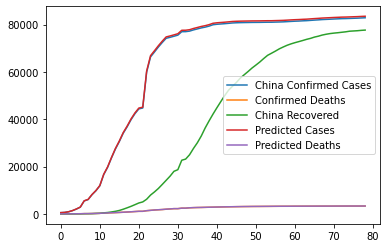

In [135]:
t2.plot()

In [136]:
# china Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(china_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(china_recovered)
pred_val = []
for i in range(x):
  i=china_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[42.20529]]
1/1 [==============================] - 0s 4ms/step
[[44.245964]]
1/1 [==============================] - 0s 3ms/step
[[50.367958]]
1/1 [==============================] - 0s 3ms/step
[[53.427784]]
1/1 [==============================] - 0s 834us/step
[[63.539764]]
1/1 [==============================] - 0s 1ms/step
[[72.53114]]
1/1 [==============================] - 0s 715us/step
[[115.489975]]
1/1 [==============================] - 0s 801us/step
[[134.47177]]
1/1 [==============================] - 0s 825us/step
[[149.4574]]
1/1 [==============================] - 0s 1ms/step
[[228.38177]]
1/1 [==============================] - 0s 995us/step
[[289.32336]]
1/1 [==============================] - 0s 1ms/step
[[477.1433]]
1/1 [==============================] - 0s 891us/step
[[627.9987]]
1/1 [==============================] - 0s 774us/step
[[856.7794]]
1/1 [==============================] - 0s 711us/step
[[1128.519]]
1/1 [=========

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t3 = raw_seq

In [138]:
print(t3)

         Dates  China Confirmed Cases  ...  Predicted Deaths  Predicted Recovered
0   01/22/2020                    548  ...         32.550804            42.205292
1   01/23/2020                    643  ...         33.570232            44.245964
2   01/24/2020                    920  ...         41.725685            50.367958
3   01/25/2020                   1406  ...         57.882385            53.427784
4   01/26/2020                   2075  ...         71.877373            63.539764
5   01/27/2020                   2877  ...         97.868095            72.531143
6   01/28/2020                   5509  ...        146.850571           115.489975
7   01/29/2020                   6087  ...        148.849884           134.471771
8   01/30/2020                   8141  ...        186.836304           149.457397
9   01/31/2020                   9802  ...        228.821289           228.381775
10  02/01/2020                  11891  ...        274.804871           289.323364
11  02/02/2020  

In [139]:
t3.tail(10)

,Dates,China Confirmed Cases,Confirmed Deaths,China Recovered,Predicted Cases,Predicted Deaths,Predicted Recovered
69,03/31/2020,82279,3309,76206,82921.078125,3323.715576,76385.164062
70,04/01/2020,82361,3316,76405,83003.710938,3330.713379,76584.625000
71,04/02/2020,82432,3322,76565,83075.234375,3336.711182,76744.984375
72,04/03/2020,82511,3326,76760,83154.835938,3340.709473,76940.437500
73,04/04/2020,82543,3330,76946,83187.070312,3344.707520,77126.875000
74,04/05/2020,82602,3333,77207,83246.539062,3347.707031,77388.468750
75,04/06/2020,82665,3335,77310,83310.015625,3349.706055,77491.710938
76,04/07/2020,82718,3335,77410,83363.421875,3349.706055,77591.945312
77,04/08/2020,82809,3337,77567,83455.117188,3351.705566,77749.289062
78,04/09/2020,82883,3339,77679,83529.671875,3353.704346,77861.546875


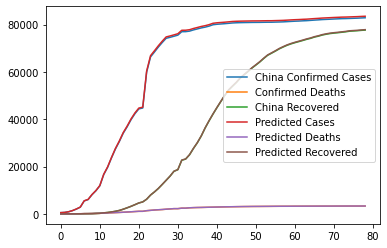

In [140]:
t3.plot()

In [0]:
t3.to_csv (r'/content/drive/My Drive/china_og_preds.csv', index = False, header=True)

In [158]:
from sklearn.metrics import r2_score
score = r2_score(t3['China Confirmed Cases'], t3['Predicted Cases'])
print(score)
a= score

0.9996496270307114


In [159]:
from sklearn.metrics import r2_score
score = r2_score(t3['China Recovered'], t3['Predicted Recovered'])
print(score)
b= score

0.9999855253432741


In [160]:
from sklearn.metrics import r2_score
score = r2_score(t3['Confirmed Deaths'], t3['Predicted Deaths'])
print(score)
c = score

0.9998469686097212


In [161]:
Average_r2score_ondataset = (a + b + c)/3
print(Average_r2score_ondataset)

0.9998273736612355


In [143]:
pd.set_option('display.max_rows', t3.shape[0]+1)
print(t3)

         Dates  China Confirmed Cases  ...  Predicted Deaths  Predicted Recovered
0   01/22/2020                    548  ...         32.550804            42.205292
1   01/23/2020                    643  ...         33.570232            44.245964
2   01/24/2020                    920  ...         41.725685            50.367958
3   01/25/2020                   1406  ...         57.882385            53.427784
4   01/26/2020                   2075  ...         71.877373            63.539764
5   01/27/2020                   2877  ...         97.868095            72.531143
6   01/28/2020                   5509  ...        146.850571           115.489975
7   01/29/2020                   6087  ...        148.849884           134.471771
8   01/30/2020                   8141  ...        186.836304           149.457397
9   01/31/2020                   9802  ...        228.821289           228.381775
10  02/01/2020                  11891  ...        274.804871           289.323364
11  02/02/2020  

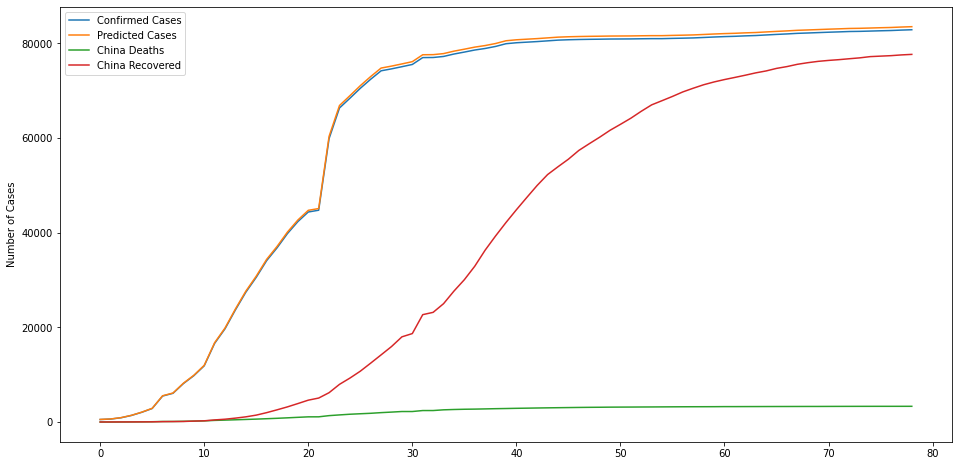

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['China Confirmed Cases'])
plt.plot(t3['Predicted Cases'])
plt.plot(t3['Confirmed Deaths'])
#plt.plot(t3['Predicted Deaths'])
plt.plot(t3['China Recovered'])
#plt.plot(t3['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'Predicted Cases', 'China Deaths', 'China Recovered'], loc='upper left')
plt.show()

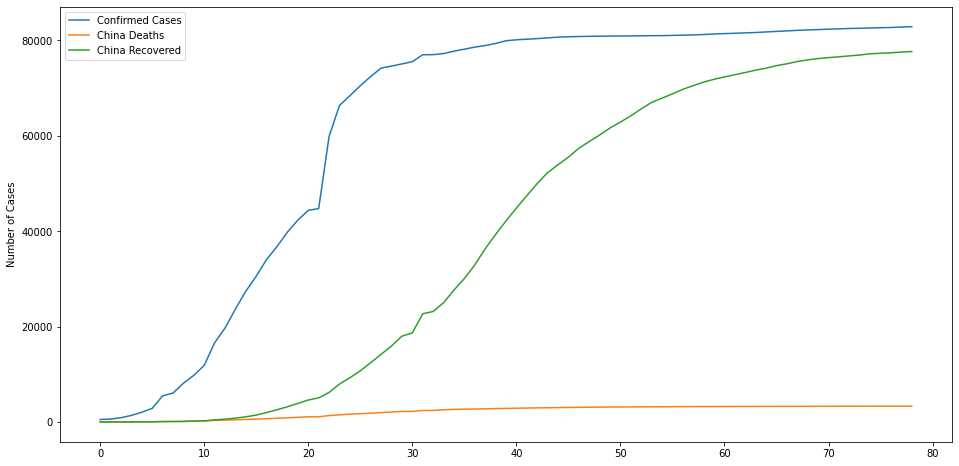

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['China Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t3['Confirmed Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t3['China Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'China Deaths', 'China Recovered'], loc='upper left')
plt.show()

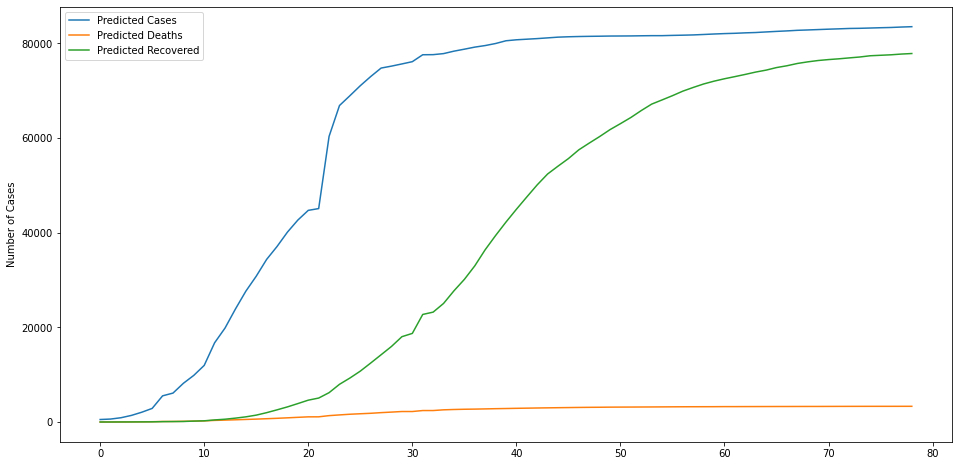

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t3['Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t3['Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t3['Predicted Recovered'])
plt.legend(['Predicted Cases', 'Predicted Deaths', 'Predicted Recovered'], loc='upper left')
plt.show()

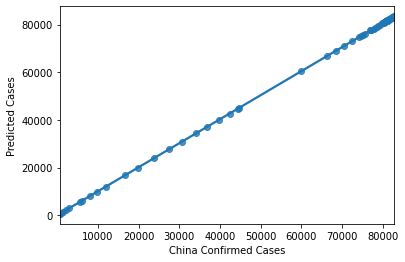

In [147]:
import seaborn as sns
sns.regplot(t3['China Confirmed Cases'], t3['Predicted Cases'])


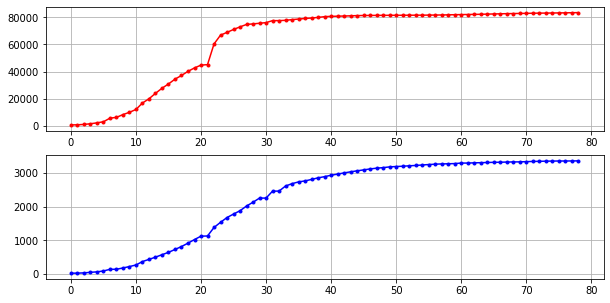

In [148]:
aj = t3['Predicted Cases']
jk = t3['Predicted Deaths']
lm = t3['Predicted Recovered']
lp = t3['China Confirmed Cases']
lt = t3['China Recovered']
lx = t3['Confirmed Deaths']
fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(211)
line1 = ax1.plot(aj,marker='.',color='red',label="Predicted Cases")
ax2 = fig.add_subplot(212)
line2 = ax2.plot(jk,marker='.',color='blue',label="Predicted Deaths")
ax1.grid()
ax2.grid()
plt.show()

In [149]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='Predicted Cases',
    color='China Confirmed Cases',
).interactive()

alt.Chart(...)

In [150]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='Predicted Deaths',
    color='Confirmed Deaths',
).interactive()

alt.Chart(...)

In [151]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='Predicted Recovered',
    color='China Recovered',
).interactive()

alt.Chart(...)